# Computer Vision Demo
## Practical Implementation of Image Classification with PyTorch using Fashion MNIST Dataset

**Run the Computer Vision Demo in a colab notebook**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/murilogustineli/computer-vision-demo/blob/main/cv_demo.ipynb)

**References:**
- [TensorFlow tutorial: Basic Image Classification](https://www.tensorflow.org/tutorials/keras/classification?linkId=9317518)
- [Fashion MNIST GitHub repo](https://github.com/zalandoresearch/fashion-mnist)
- [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition)

Welcome to this practical implementation, where we delve into the world of computer vision using PyTorch. Our goal is to develop a practical understanding of Convolutional Neural Networks (CNNs) by implementing a model that can classify different types of clothing. This demo is designed for learners at all levels, so don't worry if some concepts seem new. We'll walk through each step of the process, explaining the key ideas and code details along the way.

In [1]:
# PyTorch
import torch

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Check if cuda is available
cuda_availability = torch.cuda.is_available()
print(f"PyTorch version: {torch.__version__}")
print(f"Cuda availability: {cuda_availability}")

PyTorch version: 2.1.2
Cuda availability: False


## 1. The Fashion MNIST dataset

In this demo, we use the `Fashion MNIST` dataset, a modern alternative to the classic [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset traditionally used for handwriting recognition. 

Fashion MNIST comprises 70,000 grayscale images, each 28x28 pixels, distributed across 10 different clothing categories. These images are small, detailed, and varied enough to challenge our model while being simple enough for straightforward processing and quick training times.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

### 1.1 Dataset Structure

The dataset is split into two parts:

- **Training Set:** This includes `train_images` and `train_labels`. These are the arrays that our model will learn from. The model sees these images and their corresponding labels, adjusting its weights and biases to reduce classification error.

- **Test Set:** This comprises `test_images` and `test_labels`. These are used to evaluate how well our model performs on data it has never seen before. This is crucial for understanding the model's generalization capability.

### 1.2 Understanding the Data

Each image in the dataset is a 28x28 NumPy array. The pixel values range from 0 to 255, with 0 being black, 255 being white, and the various shades of gray in between. The labels are integers from 0 to 9, each representing a specific category of clothing.
Class Names

The dataset doesn't include the names of the clothing classes, so we will manually define them for clarity when visualizing our results. Here's the mapping:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


In the following sections, we will load and preprocess this data, design and train a CNN, and finally evaluate its performance on the test set. Let's get started!


In [2]:
# Defining class names
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot',
]

## 2. Loading the dataset

Let's load the Fashion MNIST dataset directly from PyTorch:

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check if running on Google Colab
if 'google.colab' in str(get_ipython()):
    data_dir = '/content/FashionMNIST_data/'
else:
    data_dir = './FashionMNIST_data/'  # Relative path for local execution

# Define transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Seed for reproducibility
torch.manual_seed(7)

# Download and load the training data
trainset = datasets.FashionMNIST(data_dir, download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST(data_dir, download=True, train=False, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

**Defining Transformations:**
- `transforms.ToTensor()`: Converts the images into PyTorch tensors and scales the pixel values to the range [0, 1].
- `transforms.Normalize((0.5,), (0.5,))`: Normalizes the tensor images so that each pixel value is centered around 0 and falls within the range [-1, 1]. This normalization helps in stabilizing the learning process and often leads to faster convergence in deep learning models.

### 2.1 Using DataLoader

The `DataLoader` in PyTorch provides batches of data, and you can iterate through these batches to collect all images and labels. This method is memory-efficient and is typically used when dealing with large datasets.

In [4]:
def extract_images_labels(loader):
    images = []
    labels = []
    for batch in loader:
        b_images, b_labels = batch
        images.append(b_images)
        labels.append(b_labels)
    return torch.cat(images, dim=0), torch.cat(labels, dim=0)

# Extracting train and test images and labels
train_images, train_labels = extract_images_labels(trainloader)
test_images, test_labels = extract_images_labels(testloader)

**Important Notes:**
- This method will load the entire dataset into memeory, which is fine for small datasets like the Fashion MNIST, but might not be feasible for significantly larger datasets.
- `train_images` and `test_images` will be tensors containing the image data, and `train_labels` and `test_labels` will be tensors containing the corresponding labels.
- These tensors can then be used directly for training and evaluation in your models.

## 3. Exploring the data

Before training our model, it's essential to understand the Fashion MNIST dataset's format and structure. This understanding helps in effectively tailoring our model and preprocessing steps.

### 3.1 Understanding the Training Set

- **Size and Shape of Training Images:** The shape of the train_images tensor provides insight into the number of images and their dimensions.
    
    The shape is represented as (N, C, H, W), where:
    - N = Number of images
    - C = Number of color channels per image (For grayscale images, C = 1)
    - H = Height of each image in pixels
    - W = Width of each image in pixels

In our dataset, each image is a 28 x 28 pixel grayscale image, so the shape will be (60000, 1, 28, 28), indicating 60,000 images with 1 color channel and 28x28 pixel resolution.

In [5]:
train_images.shape  # Output expected: (60000, 1, 28, 28)

torch.Size([60000, 1, 28, 28])

- **Training Labels:** The total number of labels in the training set should match the number of images. Each label corresponds to a category of fashion item.

In [6]:
len(train_labels)   # Output expected: 60000

60000

- **Label Range:** Each label is an integer from 0 to 9, where each number corresponds to a specific category (like T-shirts, trousers, etc.).

In [7]:
train_labels        # Output example: tensor([9, 8, 3, ..., 7, 7, 6])

tensor([9, 8, 3,  ..., 7, 7, 6])

### 3.2 Understanding the Test Set

- **Size and Shape of Test Images:** The test set should have a similar structure but with fewer images, typically used for evaluating the model's performance.


In [8]:
test_images.shape   # Output expected: (10000, 1, 28, 28)

torch.Size([10000, 1, 28, 28])

- **Test Labels:** The test set contains labels corresponding to each image, used to verify the model's predictions.

In [9]:
len(test_labels)    # Output expected: 10000

10000

## 4. Data Preprocessing

Before training our neural network, it's crucial to preprocess the data. This involves scaling the pixel values of the images to a standard range, which helps the network learn more efficiently.

### 4.1 Understanding Pixel Values:
- Each image in the Fashion MNIST dataset is represented in grayscale with pixel values ranging from 0 to 255.
- We applied Scaling and Normalization methods so that each pixel value is centered around 0 and falls within the range [-1, 1].
- This normalization is often used in deep learning models as it centers the data around 0, which can lead to faster convergence during training. It can also help mitigate issues caused by different lighting and contrast in images.
- The value `-1` represents black, `1` represents white, and the values in between represent various shades of gray.

Let's inspect the first image in the training set displaying these pixel values:

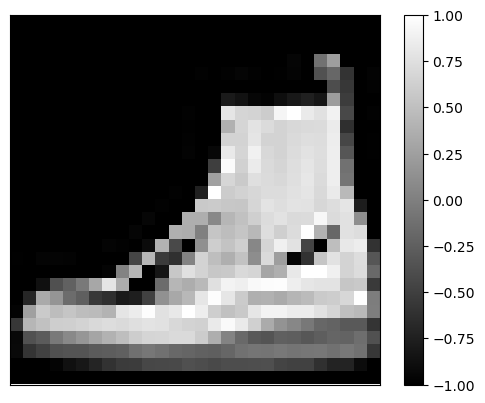

In [10]:
# Plotting firt image
plt.figure()
plt.imshow(train_images[0][0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

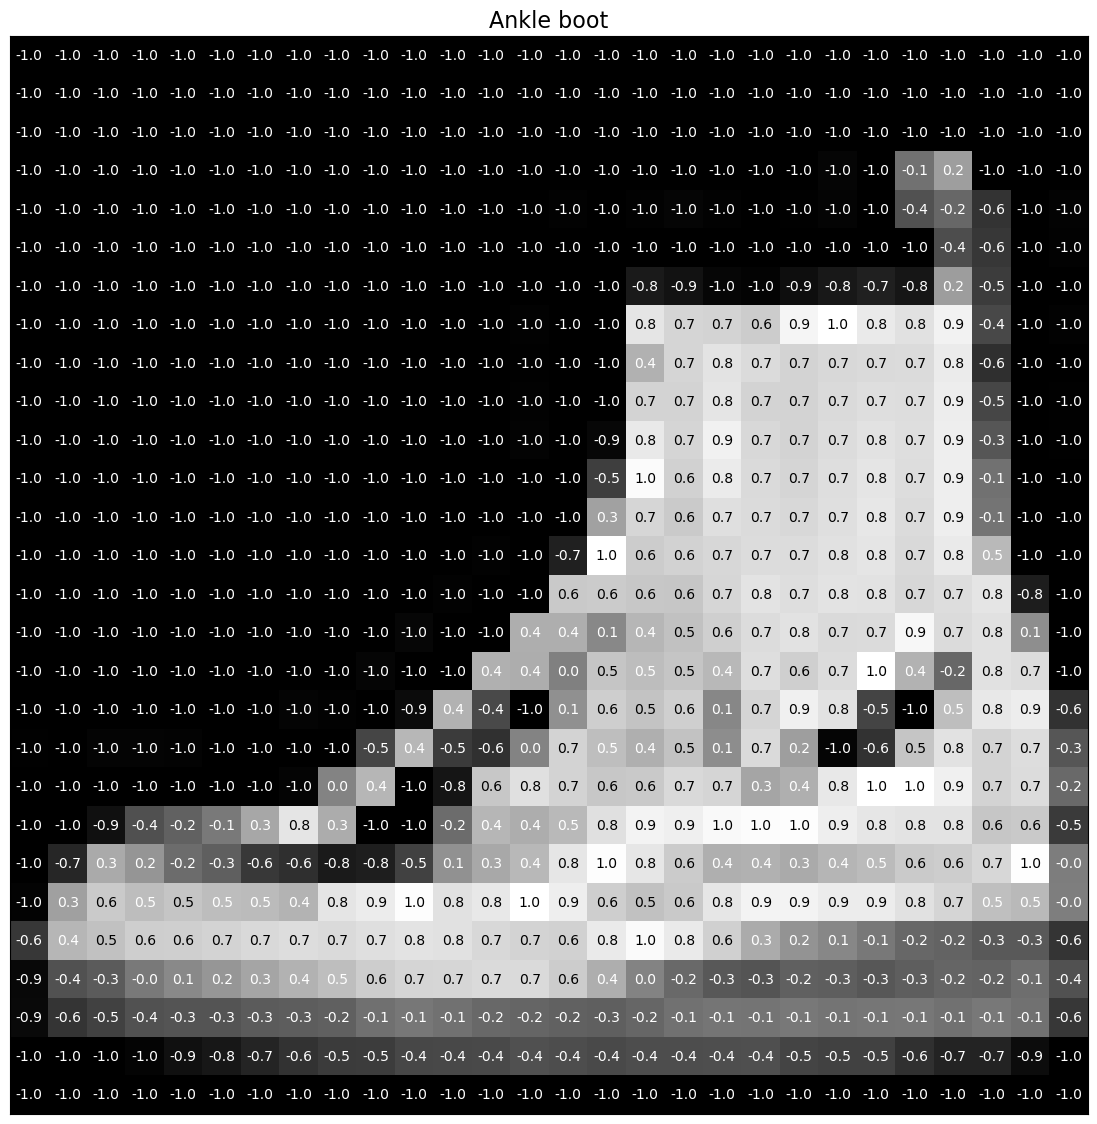

In [11]:
def get_text_color(value:float) -> str:
    """Returns 'white' for dark pixels and 'black' for light pixels."""
    return 'white' if value < 0.5 else 'black'

image_numpy = train_images[0][0].squeeze().numpy()
label = train_labels[0]

# Plotting the image
plt.figure(figsize=(14,14))
plt.imshow(image_numpy, cmap='gray')
plt.title(class_names[label], fontsize=16,)
plt.grid(False)
plt.xticks([])
plt.yticks([])

# Overlaying the pixel values
for i in range(image_numpy.shape[0]):
    for j in range(image_numpy.shape[1]):
        plt.text(j, i, '{:.1f}'.format(image_numpy[i,j]), ha='center', va='center', color=get_text_color(image_numpy[i,j]))
plt.show()

### 4.2 Verifying the Data Format:

- Before building the model, it's a good practice to visualize the data to ensure it's in the correct format. Displaying the first 25 images from the training set can help us confirm that the data is ready for model training.
- Additionally, displaying the class name below each image ensures that the labels correspond correctly to the images:

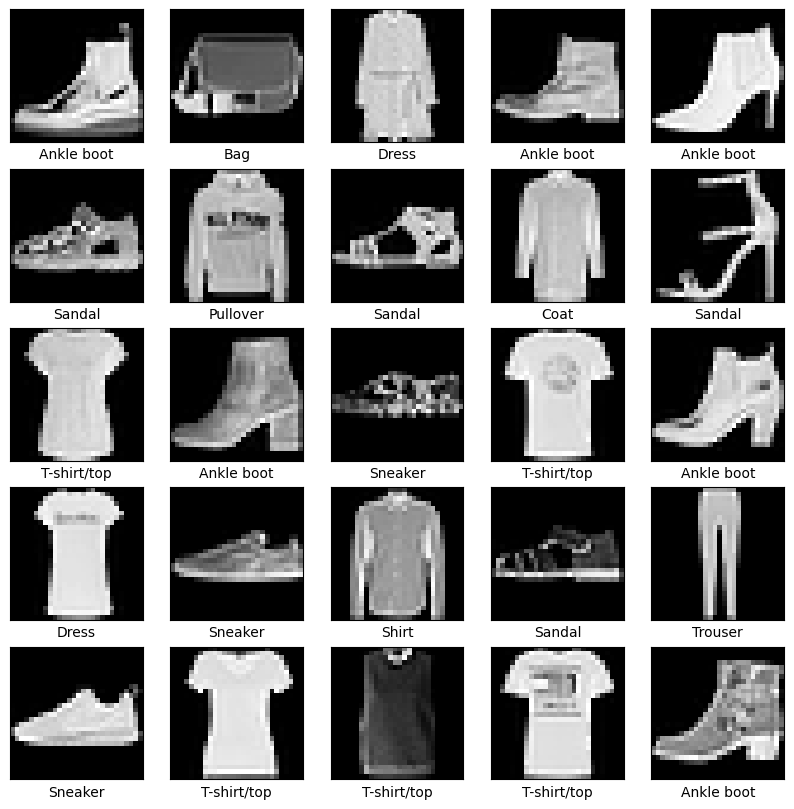

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i][0], cmap='gray') 
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Training

In deep learning, especially for tasks like image classification, **Convolutional Neural Networks (CNNs)** are often the architecture of choice. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images.

### Hierarchical Compositionality in CNNs

***Complex features are built from simpler ones.***

In Convolutional Neural Networks (CNNs), the concept of hierarchical compositionality plays a pivotal role. This idea is based on how CNNs learn to recognize and interpret images through layers that understand increasingly complex features:
- **Low-Level Features:** The initial layers of a CNN focus on simple, low-level features such as edges, colors, and basic textures.
- **Mid-Level Features:** As the data progresses through the network, these basic features are combined to form mid-level features, like shapes and specific patterns.
- **High-Level Features:** In the deeper layers, these combinations further evolve into high-level features that represent more complex aspects of the image, such as entire objects or significant parts of them.

This hierarchical approach allows CNNs to build a deep understanding of images from simple to complex, making them highly effective for tasks like image classification.

### CNN Architecture

Let's construct a CNN suitable for the Fashion MNIST dataset using PyTorch's `torch.nn` module. This CNN will consist of convolutional layers for feature extraction followed by fully connected layers for classification.

Here's how we can structure our CNN:

<!--
### Build the Model

Setting up the Layers

In deep learning, a model is typically constructed from layers. Layers are the fundamental building blocks that process input data and extract relevant features. In PyTorch, layers are implemented using various classes provided in torch.nn module.

Let's construct a simple Convolutional Neural Network (CNN) suitable for the Fashion MNIST dataset. Our network will consist of convolutional layers followed by fully connected layers.

1. **Flattening:** The images in the Fashion MNIST dataset are 2D (28x28 pixels), but to feed them into a fully connected layer, we need to flatten them into 1D vectors. This is done by reshaping the tensor.

2. **Fully Connected Layers:** After flattening the images, we'll pass the data through fully connected (dense) layers. The first dense layer will have 128 neurons and use ReLU (Rectified Linear Unit) as the activation function. The final dense layer will output the class logits, one for each of the 10 classes in the dataset.

Here's the PyTorch code for the model:

import torch.nn as nn
import torch.nn.functional as F

class NeuralNetClassifier(nn.Module):
    def __init__(self):
        super(NeuralNetClassifier, self).__init__()
        # Define layers
        self.fc = nn.Sequential(
            nn.Flatten(),               # Flatten the 2D 28x28 image into a 1D vector of 784 pixels
            nn.Linear(28*28, 128),      # First fully connected layer: 784 inputs, 128 outputs
            nn.BatchNorm1d(128),        # Batch normalization for the first fully connected layer
            nn.ReLU(inplace=True),      # ReLU activation function
            nn.Linear(128, 10),         # Second fully connected layer: 128 inputs, 10 outputs (classes)
            nn.BatchNorm1d(10),         # Batch normalization for the second fully connected layer
            nn.ReLU(inplace=True),      # Final ReLU activation function
        )

    def forward(self, x):
        x = self.fc(x)                  # Forward pass through the sequential container
        return x

# Create the model instance
model = NeuralNetClassifier()

#### Comments on the Model:

- **Sequential Container:** The `nn.Sequential` container simplifies the model definition by automatically arranging the layers in the order they are passed. It's a convenient way to stack layers and activations.

- **Fully Connected Layers (nn.Linear):**
    - The first `nn.Linear(28*28, 128)` layer takes the flattened input (784 features) and transforms it into a hidden layer with 128 neurons.
    - The second `nn.Linear(128, 10)` layer further transforms these 128 features into 10 outputs, corresponding to the 10 classes in the Fashion MNIST dataset.

- **Batch Normalization:** `nn.BatchNorm1d` is used after each fully connected layer. Batch normalization standardizes the inputs to a layer for each mini-batch. This stabilizes the learning process and significantly improves the training of deep networks by reducing internal covariate shift.

- **ReLU Activation:** `ReLU(inplace=True)` is used as an activation function. The `inplace=True` parameter is a memory optimization. It allows the modification of input data directly, which can save memory by avoiding allocating of additional space for outputs.
-->

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        # Convolutional layers using Sequential
        self.conv_layers = nn.Sequential(
            # First convolutional layer
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),   # 32 filters, 3x3 kernel, stride 1, padding 1
            nn.ReLU(inplace=True),                                  # ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2),                  # 2x2 Max pooling with stride 2

            # Second convolutional layer
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # 64 filters, 3x3 kernel, stride 1, padding 1
            nn.ReLU(inplace=True),                                  # ReLU activation
            nn.MaxPool2d(kernel_size=2, stride=2),                  # 2x2 Max pooling with stride 2
        )

        # Fully connected layers using Sequential
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                           # Flatten the output of conv layers
            nn.Linear(64 * 7 * 7, 128),                             # Fully connected layer with 128 neurons
            nn.ReLU(inplace=True),                                  # ReLU activation
            nn.Linear(128, 10)                                      # Output layer with 10 neurons for 10 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)                                     # Pass through conv layers
        x = self.fc_layers(x)                                       # Pass through fully connected layers
        return x

# Create the model instance
model = CNNClassifier()

#### Architecture explanation:

- **Convolutional Layers:** The model starts with two sets of convolutional layers, each followed by a ReLU activation and a max pooling layer. The first `Conv2d` layer takes a single-channel (grayscale) image and applies 32 filters. The second `Conv2d` layer increases the depth to 64 filters.

- **ReLU Activation:** After each convolutional layer, a ReLU activation function is used. It introduces non-linearity, allowing the model to learn more complex patterns.

- **Max Pooling:** Each max pooling layer (`MaxPool2d`) reduces the spatial dimensions of the feature map by half, helping in reducing the computation and controlling overfitting.

- **Fully Connected Layers:** The output from the convolutional layers is flattened into a 1D vector and then passed through two fully connected layers. The first linear layer reduces the dimension to 128, and the second linear layer produces the final output corresponding to the 10 classes.

This architecture, structured using the `nn.Sequential` container, offers a clear and compact way to define a CNN in PyTorch. The model is now ready to be trained with the Fashion MNIST dataset.

### Compiling the Model in PyTorch

Before training, the model requires a few additional settings, including an optimizer, a loss function, and metrics for evaluation:

1. **Optimizer:** The optimizer is responsible for updating the model parameters based on the computed gradients. It's crucial for the convergence of the training process.

2. **Loss Function:** The loss function measures the discrepancy between the model's predictions and the actual labels. During training, we aim to minimize this loss.

3. **Metrics:** While PyTorch does not use a metrics parameter like TensorFlow, we often track metrics such as accuracy manually within the training loop.

Here's how you set up these components in PyTorch:

In [14]:
import torch.optim as optim

# Set the loss function
loss_fn = nn.CrossEntropyLoss()

# Set the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Note: In PyTorch, metrics like accuracy are not defined here but are calculated during the training loop.

#### Explanation:

- **Cross-Entropy Loss:** We use `nn.CrossEntropyLoss` for multi-class classification. This loss function combines nn.LogSoftmax and nn.NLLLoss in one single class. It is suitable for classification tasks with C classes.

- **Adam Optimizer:** `optim.Adam` is used as the optimizer. It's a popular choice due to its effectiveness in handling sparse gradients and adapting the learning rate during training.

- **Learning Rate (lr):** This is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Here, it's set to 0.001.